## Research

**using this there is no need to reload your packages every time when you will make any improvement to them**

In [1]:
%load_ext autoreload

In [2]:
autoreload 2

**import necessary libraries**

In [140]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd 
import sys
import warnings
from collections import defaultdict

from pathlib import Path

**set warnings options**

In [4]:
warnings.filterwarnings('ignore')

#### to have ease in importing modules

In [5]:
sys.path.insert(0, '/Users/mjasiecz/PycharmProjects/new_offer_success_predictor/src')

**set pandas options**

In [6]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 200

**import packages for manage and preprocess data**

In [7]:
from data.data_manager import DataManager

**load data pipeline**

In [8]:
DM = DataManager()
df = DM.load_data()

In [129]:
data_path = Path('/Users/mjasiecz/PycharmProjects/new_offer_success_predictor/data/raw/client_database.parquet')

In [130]:
initial_df = pd.read_parquet(data_path, engine='pyarrow')

In [131]:
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 15 columns):
offer_class           1289 non-null object
accepted              1289 non-null object
name                  1289 non-null object
gender                1289 non-null object
age                   877 non-null float64
phone_calls           1286 non-null float64
emails                1287 non-null float64
customer_code         1265 non-null object
salary                1281 non-null float64
offer_code            1287 non-null object
customer_type         1287 non-null object
number                1280 non-null object
offer_value           1277 non-null float64
estimated_expenses    1286 non-null float64
center                1306 non-null object
dtypes: float64(6), object(9)
memory usage: 163.6+ KB


In [236]:
initial_df[initial_df['accepted'].isna()][:5]

,offer_class,accepted,name,gender,age,phone_calls,emails,customer_code,salary,offer_code,customer_type,number,offer_value,estimated_expenses,center
1289,None,None,None,None,NaN,NaN,NaN,None,NaN,None,None,None,NaN,NaN,A
1290,None,None,None,None,NaN,NaN,NaN,None,NaN,None,None,None,NaN,NaN,A
1291,None,None,None,None,NaN,NaN,NaN,None,NaN,None,None,None,NaN,NaN,A
1292,None,None,None,None,NaN,NaN,NaN,None,NaN,None,None,None,NaN,NaN,B
1293,None,None,None,None,NaN,NaN,NaN,None,NaN,None,None,None,NaN,NaN,A


In [134]:
# 20 rows to drop as they are all empty (except of center column)

In [158]:
train_df, test_df = DM.load_train_test()

In [147]:
positive_response = len(train_df[train_df['accepted'] == 'yes'])/len(train_df)

In [148]:
negative_response = 1-positive_response

In [149]:
positive_response

0.3792434529582929

In [150]:
negative_response

0.6207565470417071

#### <- i didnt decided to balance data although i could test it
#### mainly because I assumed that this gap is too small to matter during modelling (and i assumed that maybe the same situation is out there in real world (also because stratify during train test split)) <- my mistake

In [114]:
train_df.head()

,accepted,offer_class,gender,age,phone_calls,emails,customer_code,salary,offer_code,customer_type,number,offer_value,estimated_expenses,center
name,,,,,,,,,,,,,,
8550AB469CB2445,no,Premium,female,NaN,1.0,2.0,2678,1524.58,8CA,C,0F2A2,303.973257,7207.0,B
07355EE27DD1493,no,High,male,32.0,0.0,0.0,244360,1300.00,9DD,S,5F15A,64.075055,3675.0,A
034E73A251554F0,yes,Premium,female,NaN,1.0,1.0,370365,1550.00,517,Q,AC578,108.581750,4750.0,B
0AF961B4AC7A439,no,Premium,male,NaN,0.0,1.0,2652,722.92,9CB,C,8A8CC,155.495957,1401.0,A
8535BBCA690A4AE,yes,Premium,male,NaN,0.0,1.0,1601,5649.58,6FF,S,42EFB,121.371033,2106.0,B


In [115]:
train_df.tail()

,accepted,offer_class,gender,age,phone_calls,emails,customer_code,salary,offer_code,customer_type,number,offer_value,estimated_expenses,center
name,,,,,,,,,,,,,,
6AEFDFD6EEB74C8,no,High,female,44.0,1.0,1.0,244252,2600.0,2BE,S,ED5DA,107.400764,2171.0,A
ED05F307FBE84DC,yes,High,female,NaN,1.0,3.0,C.A. 34651,2775.0,8FA,S,539D7,179.985763,7046.0,B
86D4FB50F10A47C,no,Premium,male,22.5,0.0,0.0,2698,722.5,B02,C,2605C,133.856215,7587.0,B
BE1E8CA987174CF,yes,Premium,female,NaN,0.0,2.0,371362,1610.0,1F8,S,0F27C,57.744836,7506.0,B
358EEC4160A4478,no,High,male,25.0,0.0,1.0,234686,1300.0,3CA,S,667C4,50.454597,7235.0,B


In [222]:
######### to presentation

In [228]:
# not unique customer_code

In [224]:
train_df['customer_code'].nunique()

752

In [227]:
train_df['customer_code'].notnull().sum()

1031

In [233]:
train_df[['customer_code', 'gender', 'offer_code']][:10]

,customer_code,gender,offer_code
name,,,
8550AB469CB2445,2678,female,8CA
07355EE27DD1493,244360,male,9DD
034E73A251554F0,370365,female,517
0AF961B4AC7A439,2652,male,9CB
8535BBCA690A4AE,1601,male,6FF
B8A3C4B5FDE74D2,315082,male,DDF
2C797DCB48744EA,C.A. 2315,female,4EB
1004379959394F2,2691,female,0.00E+00
46AACF6692654AF,36865,male,69F


In [237]:
# train_df[['age']]

In [222]:
######### to presentation

In [116]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1031 entries, 8550AB469CB2445 to 358EEC4160A4478
Data columns (total 14 columns):
accepted              1031 non-null object
offer_class           1031 non-null object
gender                1031 non-null object
age                   688 non-null float64
phone_calls           1029 non-null float64
emails                1029 non-null float64
customer_code         1015 non-null object
salary                1024 non-null float64
offer_code            1029 non-null object
customer_type         1029 non-null object
number                1025 non-null object
offer_value           1021 non-null float64
estimated_expenses    1028 non-null float64
center                1029 non-null object
dtypes: float64(6), object(8)
memory usage: 120.8+ KB


In [119]:
train_df.describe()

,age,phone_calls,emails,salary,offer_value,estimated_expenses
count,688.000000,1029.000000,1029.000000,1024.000000,1021.000000,1028.000000
mean,33.579215,0.515063,0.927114,3289.787930,128.163705,4610.229572
std,12.129183,1.099618,1.042638,5140.838019,57.848049,1906.746845
min,18.000000,0.000000,0.000000,0.000000,50.022619,1257.000000
25%,24.000000,0.000000,0.000000,789.580000,82.272189,2941.500000
50%,30.000000,0.000000,1.000000,1440.000000,117.513016,4578.000000
75%,41.000000,1.000000,1.000000,3100.000000,161.959845,6286.750000
max,80.000000,8.000000,10.000000,51232.920000,368.668534,7891.000000


In [120]:
train_df.corr()

,age,phone_calls,emails,salary,offer_value,estimated_expenses
age,1.000000,0.021577,0.107425,0.190776,0.034027,-0.008486
phone_calls,0.021577,1.000000,0.319243,0.172205,-0.005443,0.001770
emails,0.107425,0.319243,1.000000,0.213123,-0.020725,-0.006115
salary,0.190776,0.172205,0.213123,1.000000,-0.016851,0.009642
offer_value,0.034027,-0.005443,-0.020725,-0.016851,1.000000,-0.044092
estimated_expenses,-0.008486,0.001770,-0.006115,0.009642,-0.044092,1.000000


In [121]:
train_df.var()

age                   1.471171e+02
phone_calls           1.209160e+00
emails                1.087095e+00
salary                2.642822e+07
offer_value           3.346397e+03
estimated_expenses    3.635684e+06
dtype: float64

In [117]:
train_df.isnull().sum()

accepted                0
offer_class             0
gender                  0
age                   343
phone_calls             2
emails                  2
customer_code          16
salary                  7
offer_code              2
customer_type           2
number                  6
offer_value            10
estimated_expenses      3
center                  2
dtype: int64

In [118]:
print(df.isnull().sum()/df.shape[0]*100)

offer_class            0.000000
accepted               0.000000
gender                 0.000000
age                   31.962762
phone_calls            0.232739
emails                 0.155159
customer_code          1.861908
salary                 0.620636
offer_code             0.155159
customer_type          0.155159
number                 0.698216
offer_value            0.930954
estimated_expenses     0.232739
center                 0.232739
dtype: float64


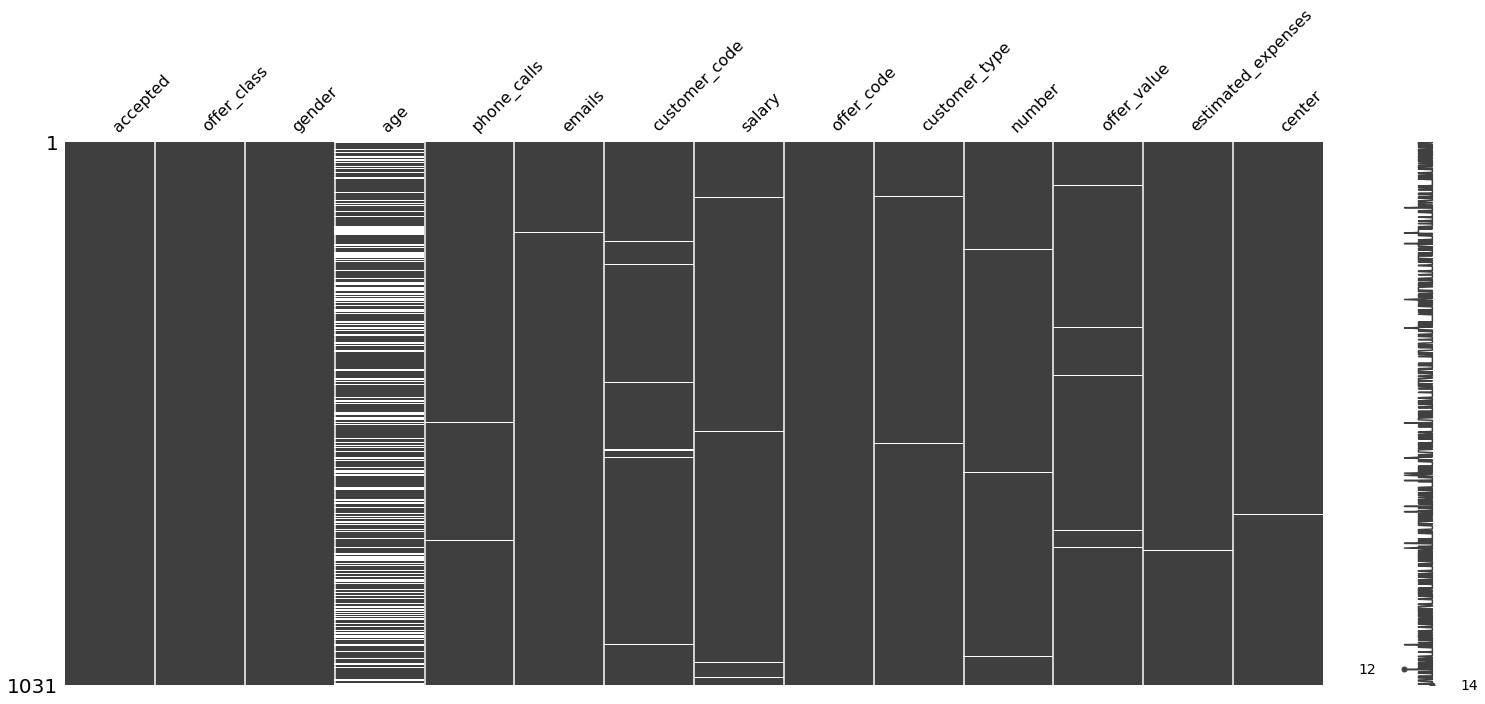

In [113]:
msno.matrix(train_df)

####  missing values other than in salary <- fancy impute knn. In the end, in the best model i used age, but dividing is as nan and notnan age - assuming that age was given to use only by people who were more interest in our offers

In [136]:
# train_df <- looking briefly by eye through whole dataframe

In [138]:
train_df.dtypes

accepted               object
offer_class            object
gender                 object
age                   float64
phone_calls           float64
emails                float64
customer_code          object
salary                float64
offer_code             object
customer_type          object
number                 object
offer_value           float64
estimated_expenses    float64
center                 object
dtype: object

In [142]:
def initial_exploration(
        data: str or Path or pd.DataFrame,
        sep: str = ',',
        output: bool = True,
        top_values: int = 5,
        desc_stats: bool = True) -> defaultdict:
    """
    Makes an initial exploration of given CSV file or pandas DataFrame.

    :param data: the path of data table or already create pandas DataFrame
    :param sep: the separator for reading CSV file
    :param output: if set to True, function returns the data
    :param top_values: number of top values, to get from .value_counts()
    :param desc_stats: if set to True, generates descriptive statistics for numeric data
    :return: the dictionary with columns statistics
    """
    csv_name = 'DATA'
    shape = df.shape

    data = defaultdict(list)

    statistics = [
        'all_values_in_column', 'missing_ratio', 'unique_ratio', 'dtype',
        f'top_{top_values}_values', f'top_{top_values}_value_counts'
    ]

    for column in df.columns:
        not_null_count = np.sum(df[column].notnull())
        data[column].append(not_null_count)
        data[column].append((shape[0] - not_null_count) / shape[0])
        data[column].append(df[column].nunique() / not_null_count if not_null_count > 0 else 0)
        data[column].append(df[column].dtype.name)

        values_counts = df[column].value_counts()
        data[column].append(values_counts.index.tolist()[:top_values])
        data[column].append(values_counts.values.tolist()[:top_values])

    if desc_stats:
        statistics += ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'sum']
        numeric_columns = set(df.select_dtypes(include='number').columns)
        descriptive_stats = df.describe()
        for column in df.columns:
            if column in numeric_columns:
                data[column].extend(descriptive_stats[column].tolist() + [df[column].sum()])
            else:
                data[column].extend(['N/A'] * 9)
    data_df = pd.DataFrame.from_dict(data, orient='index', columns=statistics)

    return data_df if output else None

In [143]:
initial_exploration(train_df, desc_stats=False, top_values=10)

,all_values_in_column,missing_ratio,unique_ratio,dtype,top_10_values,top_10_value_counts
offer_class,1289,0.000000,0.002327,object,"[Premium, Medium, High]","[695, 322, 272]"
accepted,1289,0.000000,0.001552,object,"[no, yes]","[800, 489]"
gender,1289,0.000000,0.001552,object,"[male, female]","[831, 458]"
age,877,0.319628,0.082098,float64,"[24.0, 21.0, 22.0, 30.0, 18.0, 25.0, 28.0, 36.0, 26.0, 27.0]","[46, 41, 41, 40, 38, 34, 32, 30, 30, 30]"
phone_calls,1286,0.002327,0.005443,float64,"[0.0, 1.0, 2.0, 4.0, 3.0, 8.0, 5.0]","[877, 311, 42, 22, 20, 9, 5]"
emails,1287,0.001552,0.007770,float64,"[1.0, 0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0, 10.0]","[569, 503, 132, 60, 10, 5, 4, 2, 1, 1]"
customer_code,1265,0.018619,0.710672,object,"[CA. 2343, 347077, 1601, CA 2144, S.O.C. 14879, PC 17608, 3101295, 347082, 19950, 382652]","[11, 7, 7, 7, 7, 7, 7, 7, 6, 6]"
salary,1281,0.006206,0.219360,float64,"[1300.0, 805.0, 775.0, 2600.0, 789.58, 1050.0, 777.5, 722.92, 792.5, 2655.0]","[59, 57, 53, 48, 47, 35, 26, 24, 23, 22]"
offer_code,1287,0.001552,0.855478,object,"[0.00E+00, 85, 773, 943, 4FA, 95B, CFD, E57, 12, 5.00E+08]","[5, 4, 4, 3, 3, 3, 3, 3, 3, 3]"
customer_type,1287,0.001552,0.002331,object,"[S, C, Q]","[899, 268, 120]"


In [216]:
for column in train_df.columns:
    print(column+': '+str(train_df[column].nunique()))

accepted: 2
offer_class: 3
gender: 2
age: 65
phone_calls: 7
emails: 9
customer_code: 752
salary: 259
offer_code: 901
customer_type: 3
number: 1026
offer_value: 1021
estimated_expenses: 959
center: 2
salary_: 260
cat_emails: 6
cat_phone_calls: 5


In [217]:
train_df.shape

(1031, 17)

#### missing values in number may gave us information that some customers doesnt have device (so they won't accept next offer anyway)

In [187]:
train_df[train_df['number'].isna()]

,accepted,offer_class,gender,age,phone_calls,emails,customer_code,salary,offer_code,customer_type,number,offer_value,estimated_expenses,center,salary_
name,,,,,,,,,,,,,,,
939BA02CE9B144D,no,High,male,50.0,1.0,1.0,SC/AH 3085,2600.00,866,S,NaN,85.502666,1641.0,B,2600.00
EB277CCF1471460,yes,Medium,female,33.0,1.0,1.0,113806,5310.00,975,S,NaN,86.180429,2192.0,A,5310.00
D0C00974D2EA4FF,no,Premium,male,NaN,3.0,1.0,349909,2107.50,BBD,S,NaN,99.017300,6179.0,B,2107.50
5DE6925AF148499,no,Premium,male,NaN,0.0,1.0,2624,722.50,4FA,C,NaN,64.267428,7705.0,A,722.50
F1E0937D8B88439,yes,Medium,female,50.0,0.0,2.0,PC 17558,24752.08,660,C,NaN,203.472922,5285.0,A,24752.08
9365B174479F421,no,High,male,23.0,2.0,2.0,29104,1150.00,C1F,S,NaN,71.464702,3560.0,B,1150.00


#### some accepted <- anyway i didnt use this column during modelling

In [166]:
train_df[train_df['salary'].isna()]['customer_code']

name
BFAEC8F911F841B     3101278
2D7B8459CBD2414    PC 17611
A14D00E1FEBF433        3701
487662632F6B484      113789
EF319AAD8691472      113776
CCF5A463D3BC472       14313
DAF778DD00F8407       13214
Name: customer_code, dtype: object

In [159]:
train_df['salary_'] = train_df['salary']
train_df.loc[train_df['salary_'].isna(), 'salary_'] = 0.0001

In [167]:
cc_salaries = train_df[['customer_code', 'salary_']].groupby(['customer_code', 'salary_']).size().reset_index().rename(columns={0: 'size'})

In [168]:
len(cc_salaries)

756

In [170]:
cc_salaries['customer_code'].nunique()

751

In [176]:
cc_salaries[cc_salaries.duplicated(subset=['customer_code'], keep=False)]

,customer_code,salary_,size
33,113776,0.0001,1
34,113776,6660.0000,1
42,113789,0.0001,1
43,113789,5200.0000,1
277,3101278,0.0001,1
278,3101278,1585.0000,1
571,7534,921.6700,1
572,7534,984.5800,1
679,PC 17611,0.0001,1
680,PC 17611,13365.0000,1


#### filled nans in salary by customer code, those are not much cases, because there are lot of cases
#### when people with exact same cc have the same salary, and only one case when there was different

#### i looked through number, customer_code and offer_code to see if i can engineer something out of it (again, i was mainly looking at response ratio in train set)

In [182]:
# train_df['number']

In [183]:
# train_df['customer_code']

In [184]:
# train_df['offer_code']

#### emails and phone_calls columns - dealing with these columns / (without dividing process onto parts - missing, outliers etc)

#### emails

In [188]:
train_df['emails'].mean()

0.9271137026239067

In [189]:
round(train_df['emails'].mean())

1.0

In [190]:
train_df['cat_emails'] = train_df['emails']

In [191]:
train_df.loc[train_df['cat_emails'].isna(), 'cat_emails'] = round(train_df['emails'].mean())

In [192]:
train_df[train_df['emails']>4]['accepted'].value_counts()

no     11
yes     1
Name: accepted, dtype: int64

In [193]:
train_df.loc[train_df['cat_emails'] > 4, 'cat_emails'] = 5

In [194]:
train_df['cat_emails'] = train_df['cat_emails'].astype(object)

#### phone_calls

In [195]:
train_df['phone_calls'].mean()

0.5150631681243926

In [196]:
round(train_df['phone_calls'].mean())

1.0

In [197]:
train_df['cat_phone_calls'] = train_df['phone_calls']

In [198]:
train_df.loc[train_df['cat_phone_calls'].isna(), 'cat_phone_calls'] = round(train_df['phone_calls'].mean())

In [199]:
train_df[train_df['phone_calls']>3]['accepted'].value_counts()

no     30
yes     2
Name: accepted, dtype: int64

In [200]:
train_df.loc[train_df['cat_phone_calls'] > 3, 'cat_phone_calls'] = 4

In [201]:
train_df['cat_phone_calls'] = train_df['cat_phone_calls'].astype(object)

In [204]:
train_df.loc[train_df['customer_code'].isna(), 'customer_code'] = 'missing'

In [206]:
train_df[train_df['customer_code'].str.startswith('A')]['accepted'].value_counts()

no     24
yes     2
Name: accepted, dtype: int64

In [207]:
train_df[train_df['customer_code'].str.startswith('P')]['accepted'].value_counts()

yes    50
no     23
Name: accepted, dtype: int64

In [208]:
train_df[train_df['customer_code'].str.startswith('C')]['accepted'].value_counts()

no     40
yes    19
Name: accepted, dtype: int64

In [209]:
train_df[train_df['customer_code'].str.len() == 5]['accepted'].value_counts()

yes    90
no     57
Name: accepted, dtype: int64

In [210]:
train_df[train_df['customer_code'].str.len() == 8]['accepted'].value_counts()

yes    49
no     39
Name: accepted, dtype: int64

In [212]:
train_df['number'].fillna('number_missing', inplace=True)

In [213]:
train_df['offer_code'].fillna('offer_code_missing', inplace=True)

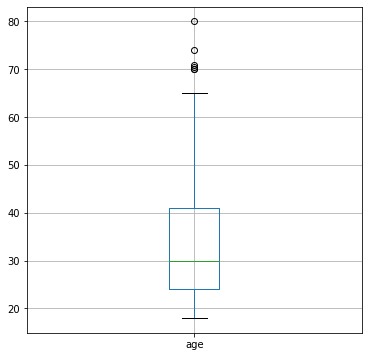

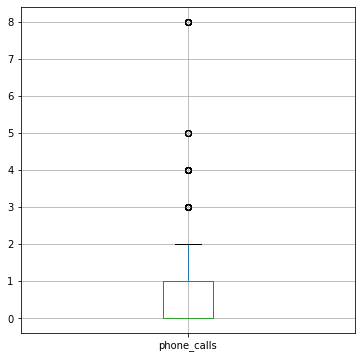

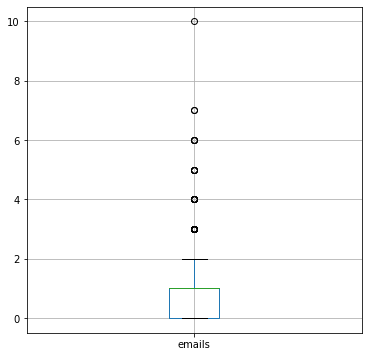

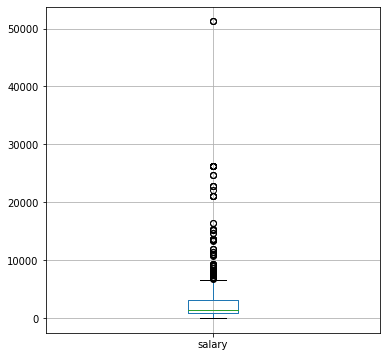

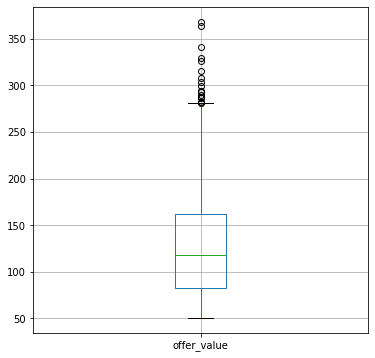

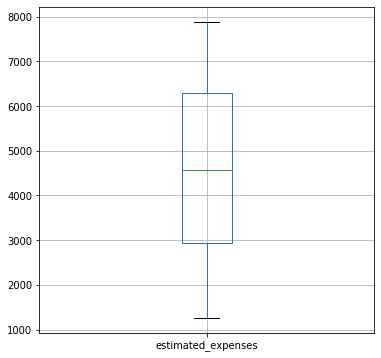

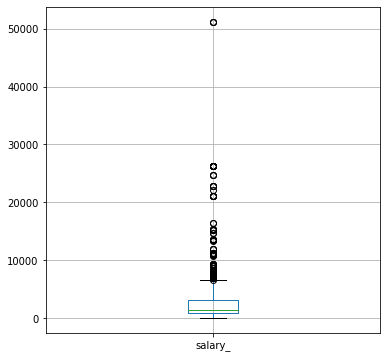

In [214]:
figsize=(6,6)
for column in train_df.columns:
    if train_df[column].dtype != object:
        train_df.boxplot(column=column, figsize=figsize)
        plt.show() #boxplots in plotly to get more information out of them?

#### Decision Trees are no sensitive to outliers - so I knew that they exist but i didnt even drop them

##### before refactoring i did a lot things like "do this this and this with these column" (ex. take only cc which starts with A) and check the response ratio if is somehow different than usual

In [215]:
train_df[train_df['offer_value'].isna()]['accepted'].value_counts()

no     8
yes    2
Name: accepted, dtype: int64

In [219]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [220]:
train_df[train_df['offer_code'].apply(is_number)]['accepted'].value_counts()

no     155
yes     95
Name: accepted, dtype: int64

In [221]:
train_df[~train_df['offer_code'].apply(is_number)]['accepted'].value_counts()

no     485
yes    296
Name: accepted, dtype: int64

In [177]:
#############################

In [178]:
#############################

In [179]:
#############################

#### presentation part, done after modelling

In [16]:
gender_insight = df[['accepted', 'gender']].groupby(['gender', 'accepted']).size().reset_index().rename(columns={0:'size'})

In [21]:
gender_insight[gender_insight['gender'] == 'female']

,gender,accepted,size
0,female,no,127
1,female,yes,331


In [23]:
# hardcoded, only plots purposes

In [24]:
331/(127+331)

0.722707423580786

In [27]:
127+331

458

In [22]:
gender_insight[gender_insight['gender'] == 'male']

,gender,accepted,size
2,male,no,673
3,male,yes,158


In [25]:
158/(158+673)

0.1901323706377858

In [26]:
158+673

831

In [29]:
831/(458+831)

0.6446858029480217

In [45]:
df_cc = df[['customer_code', 'gender', 'accepted']]

In [54]:
duplicats_cc = df_cc[df_cc.duplicated(subset=['customer_code'], keep=False)]

In [56]:
duplicats_cc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, C7CBB5C5613449B to 2E67CB8AC1D8443
Data columns (total 3 columns):
customer_code    576 non-null object
gender           600 non-null object
accepted         600 non-null object
dtypes: object(3)
memory usage: 18.8+ KB


In [59]:
duplicats_cc = duplicats_cc[duplicats_cc['customer_code'].notna()]

In [60]:
duplicats_cc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 576 entries, C7CBB5C5613449B to 2E67CB8AC1D8443
Data columns (total 3 columns):
customer_code    576 non-null object
gender           576 non-null object
accepted         576 non-null object
dtypes: object(3)
memory usage: 18.0+ KB


In [79]:
duplicats_cc['customer_code'].nunique()

210

In [64]:
# add customer_code response ratio as a feature 

In [68]:
len(df)-len(duplicats_cc)

713

In [102]:
713/1289

0.5531419705197828

In [73]:
behavior =        (duplicats_cc
         .sort_values('customer_code')
         .groupby(['customer_code', 'accepted'])
         .size()
         .reset_index()
         .rename(columns={0: 'size'}))

In [81]:
identical_response= behavior[~behavior.duplicated(subset=['customer_code'], keep=False)]

In [83]:
len(identical_response)

128

In [87]:
128/210

0.6095238095238096

In [85]:
identical_response['size'].sum()

345

In [86]:
345/576

0.5989583333333334

In [100]:
duplicats_cc[['customer_code']].groupby(['customer_code']).size().reset_index().groupby([0]).size()

0
2     129
3      49
4      13
5       7
6       4
7       7
11      1
dtype: int64

In [101]:
129*2+3*49+4*13+5*7+6*4+7*7+11

576

In [107]:
duplicats_cc[duplicats_cc['customer_code'] == 'CA. 2343']

,customer_code,gender,accepted
name,,,
7AF493A2CD8E4FA,CA. 2343,male,no
3A9C52F8A32046F,CA. 2343,male,no
881815EF2A8A484,CA. 2343,female,no
B551CD3E07904F1,CA. 2343,female,no
BDF502F66E634B1,CA. 2343,female,no
9044BC863E934F0,CA. 2343,female,no
B02195C26B024EC,CA. 2343,male,no
3FCFB49CFC814CA,CA. 2343,male,no
46D214F8C0684A2,CA. 2343,male,no
